In [145]:
#Import Packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot') 
import seaborn as sns;sns.set(style="ticks", color_codes=True)
import scipy as sci
from sklearn.linear_model import LinearRegression

#CSV MERGE AND SORT
NFLWins = pd.read_csv('Wins.csv')
NFLSalary = pd.read_csv('Salary.csv')
DF = pd.merge(NFLWins,NFLSalary, on=['Year','Team_Name'])
DF = DF.reset_index(drop=True)

#ADD CALCULATED FIELDS TO DF FOR ANALYSIS
DF['DB_Pct'] = DF.DB_Spend / DF.Active_Payroll 
DF['DL_Pct'] = DF.DL_Spend / DF.Active_Payroll 
DF['LB_Pct'] = DF.LB_Spend / DF.Active_Payroll 
DF['OL_Pct'] = DF.OL_Spend / DF.Active_Payroll 
DF['QB_Pct'] = DF.QB_Spend / DF.Active_Payroll 
DF['RB_Pct'] = DF.RB_Spend / DF.Active_Payroll 
DF['ST_Pct'] = DF.ST_Spend / DF.Active_Payroll 
DF['TE_Pct'] = DF.TE_Spend / DF.Active_Payroll 
DF['WR_Pct'] = DF.WR_Spend / DF.Active_Payroll 

DF['OFF_Pct'] = DF.OL_Pct+DF.QB_Pct+DF.RB_Pct+DF.TE_Pct+DF.WR_Pct
DF['DEF_Pct'] = DF.DB_Pct+DF.DL_Pct+DF.LB_Pct
DF['QBOL_Pct'] = DF.QB_Pct+DF.OL_Pct
DF['Skill_Pct'] = DF.QB_Pct+DF.RB_Pct+DF.WR_Pct+DF.TE_Pct
DF['OLDL_Pct'] = DF.OL_Pct+DF.DL_Pct
DF['DLLB_Pct'] = DF.DL_Pct+DF.LB_Pct
DF['DST_Pct'] = DF.DEF_Pct+DF.ST_Pct

#Year by Year Sub DataFrames
Y_2013 = DF[0:32]
Y_2014 = DF[32:64]
Y_2015 = DF[64:96]
Y_2016 = DF[96:128]
Y_2017 = DF[128:160]
Y_2018 = DF[160:192]

#Positional Spend % Sub DataFrames
Spend_Pcts = DF[['Year','OL_Pct','QB_Pct','RB_Pct','WR_Pct','TE_Pct','DL_Pct',\
                 'LB_Pct','DB_Pct','ST_Pct']]

In [258]:
#Positional Spend % Trends by Year

Spend_Pcts_AVG = Spend_Pcts.groupby('Year').mean()
(round(Spend_Pcts_AVG,2)*100).astype('int64').astype('str')+'%'

,OL_Pct,QB_Pct,RB_Pct,WR_Pct,TE_Pct,DL_Pct,LB_Pct,DB_Pct,ST_Pct
Year,,,,,,,,,
2013,18%,9%,6%,11%,5%,16%,14%,16%,4%
2014,18%,10%,5%,11%,5%,17%,14%,16%,3%
2015,17%,11%,5%,11%,5%,16%,14%,18%,3%
2016,17%,12%,4%,11%,5%,15%,14%,18%,3%
2017,18%,11%,5%,11%,5%,16%,13%,17%,3%
2018,19%,12%,4%,11%,5%,17%,12%,17%,3%


In [142]:
#Offense/Defense/Special Teams Spend% vs. Team Win %#

OFF_D_ST=DF[['OFF_Pct','DEF_Pct','ST_Pct','Win_Pct']].corr()

In [276]:
#Filter correlation matrix
round(OFF_D_ST[3::],2)

,OFF_Pct,DEF_Pct,ST_Pct,Win_Pct
Win_Pct,0.01,-0.02,0.04,1.0


In [139]:
#Offense Positional Spend% vs. Team Win %#

Offensive_Positions=DF[['OL_Pct','QB_Pct','RB_Pct','WR_Pct','TE_Pct','Win_Pct']].corr()

In [275]:
#Filter correlation matrix
Offensive_Positions[5::]
round(Offensive_Positions[5::],2)

,OL_Pct,QB_Pct,RB_Pct,WR_Pct,TE_Pct,Win_Pct
Win_Pct,-0.11,0.08,-0.04,0.01,0.06,1.0


In [261]:
#Defense Positional Spend% vs. Team Win %#
Defensive_Positions = DF[['DL_Pct','LB_Pct','DB_Pct','Win_Pct']].corr()

In [273]:
#Filter correlation matrix
Defensive_Positions[3::]
round(Defensive_Positions[3::],2)

,DL_Pct,LB_Pct,DB_Pct,Win_Pct
Win_Pct,-0.05,0.05,0.01,1.0


In [146]:
Stacks = DF[['QBOL_Pct','Skill_Pct','OLDL_Pct','DLLB_Pct','DST_Pct','Win_Pct']].corr(method='pearson')

In [212]:
#Filter correlation matrix
Stacks[5::]
round(Stacks[5::],2)

,QBOL_Pct,Skill_Pct,OLDL_Pct,DLLB_Pct,DST_Pct,Win_Pct
Win_Pct,-0.01,0.09,-0.11,-0.02,-0.01,1.0


Text(0.5,1.08,'Offensive/Defensive Spend vs. Win %')

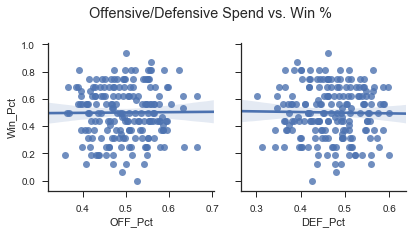

In [282]:
#Offense/Defense Spend % vs. Team Win % Scatter Plots
a = sns.pairplot(DF,x_vars=["OFF_Pct","DEF_Pct"],y_vars=["Win_Pct"], kind='reg',size=3)

a.fig.suptitle("Offensive/Defensive Spend vs. Win %", y=1.08)

Text(0.5,1.08,'Offensive Positional Spend vs. Win %')

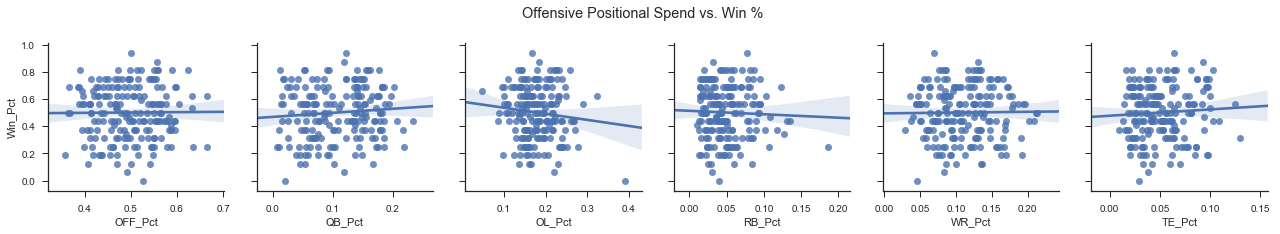

In [279]:
#Offense Positional Spend % vs. Team Win % Scatter Plots
b = sns.pairplot(DF,x_vars=["OFF_Pct","QB_Pct","OL_Pct","RB_Pct","WR_Pct","TE_Pct"],\
             y_vars=["Win_Pct"],kind='reg',size=3)

b.fig.suptitle("Offensive Positional Spend vs. Win %", y=1.08)

Text(0.5,1.08,'Defensive Positional Spend vs. Win %')

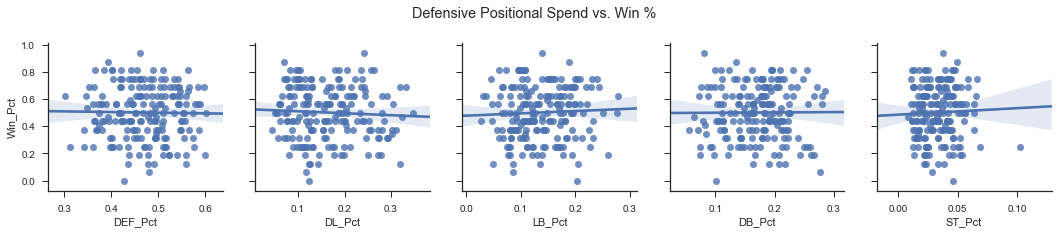

In [280]:
#Defense Positional Spend % vs. Team Win % Scatter Plots
c = sns.pairplot(DF,x_vars=["DEF_Pct","DL_Pct","LB_Pct","DB_Pct","ST_Pct"],\
                 y_vars=["Win_Pct"],kind='reg',size=3)
c.fig.suptitle("Defensive Positional Spend vs. Win %", y=1.08)

Text(0.5,1.08,'Stacked Positional Spend vs. Win %')

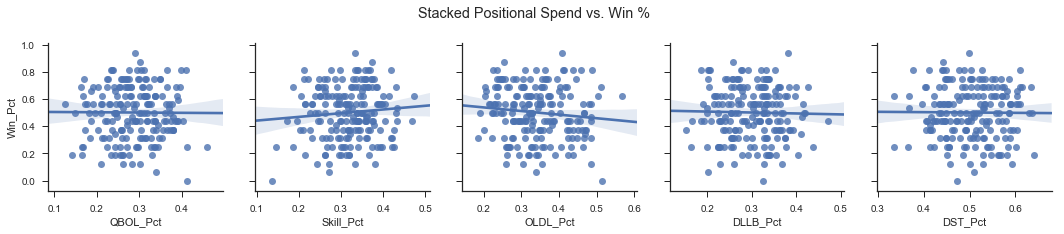

In [281]:
#Stacked Positional Spend vs. Win %
d = sns.pairplot(DF,x_vars=["QBOL_Pct","Skill_Pct","OLDL_Pct","DLLB_Pct","DST_Pct"],\
                 y_vars=["Win_Pct"],kind='reg',size=3)
d.fig.suptitle("Stacked Positional Spend vs. Win %", y=1.08)